In [5]:
import numpy as np

class MersenneTwister:
    def __init__(self, seed):
        self.seed = np.uint32(seed)
        self.index = 0
        self.mt = np.zeros(624, dtype=np.uint32)
        self.mt[0] = self.seed

        for i in range(1, 624):
            self.mt[i] = np.uint32(1812433253 * (self.mt[i - 1] ^ (self.mt[i - 1] >> 30)) + i)

    def generate(self):
        if self.index == 0:
            self.twist()

        y = self.mt[self.index]
        y ^= (y >> np.uint32(11))
        y ^= ((y << np.uint32(7)) & 0x9D2C5680)
        y ^= ((y << np.uint32(15)) & 0xEFC60000)
        y ^= (y >> np.uint32(18))

        self.index = (self.index + 1) % 624

        # Update the seed with a new random value
        self.seed = np.random.randint(0, 2**32, dtype=np.uint32)
        self.mt[0] = self.seed

        return y / np.float32(2**32 - 1)

    def twist(self):
        for i in range(624):
            y = (self.mt[i] & 0x80000000) + (self.mt[(i + 1) % 624] & 0x7FFFFFFF)
            self.mt[i] = self.mt[(i + 397) % 624] ^ (y >> 1)

            if y % 2 != 0:
                self.mt[i] ^= 0x9908B0DF

rng = MersenneTwister(seed=np.random.randint(0, 2**32, dtype=np.uint32))

In [6]:
def rand() -> float:
    return rng.generate()

# def rand() -> float:
    # return np.random.uniform(low=0.0, high=1.0, size=None)

def solve(x) -> bool:
    return True if rand() <= x else False

(array([90834., 90499., 92119., 91160., 90918., 91341., 90488., 90831.,
        90721., 90705., 90384.]),
 array([1.08359382e-06, 9.09100622e-02, 1.81819041e-01, 2.72728020e-01,
        3.63636998e-01, 4.54545977e-01, 5.45454955e-01, 6.36363934e-01,
        7.27272913e-01, 8.18181891e-01, 9.09090870e-01, 9.99999849e-01]),
 <BarContainer object of 11 artists>)

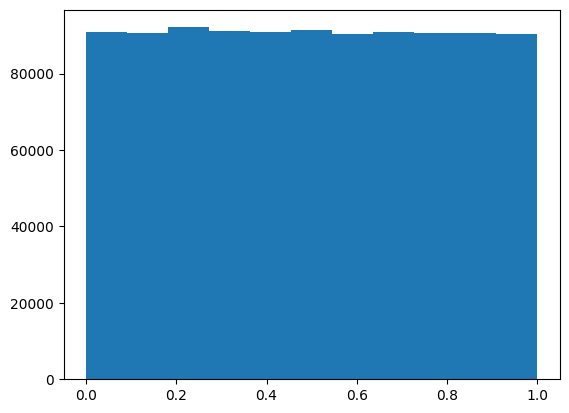

In [8]:
# Проверка равномерного распределения для датчика БСВ
import matplotlib.pyplot as plt
result = []

for _ in range(1000000):
    result.append(rand())

plt.hist(result, 11)

In [7]:
# Task 1
def task1(x):
    a = [0, 0]
    for _ in range(1000000):
        a[solve(x)] += 1
    print(a)

    if a[1] >= x * 1000000:
       return True
    else:
        return False


input_value = float(input("Введите вероятность простого случайного события: "))
print(task1(input_value))


[600260, 399740]
False


In [9]:
# Task 2
def task2(in_list: list) ->list:
    out_list = []
    for x in in_list:
        out_list.append(task1(x))
    return out_list

input_value = [float(elem) for elem in input().split()]
print(task2(input_value))

[899853, 100147]
[499932, 500068]
[99914, 900086]
[True, True, True]


In [10]:
# Task 3
def task3(p1, p2):
    out_list = [0,0,0,0]
    p3 = 1 - p2
    for i in range(1000000):
        x1 = rand()
        x2 = rand()
        if x1 <= p1:
            if x2 <= p2:
                out_list[0] += 1
            else:
                out_list[2] += 1
        else:            
            if x2 <= p3:
                out_list[1] += 1
            else:
                out_list[3] += 1
    print(out_list)
    return out_list

input_values = list(input().split())
p1, p2 = input_value[0], input_value[1]
print('AB\tAB_\tA_B\tA_B_')
print([p1*p2, (1-p1)*(1-p2), p1*(1-p2), (1-p1) * p2])
ans = task3(p1, p2)

print(max(enumerate(ans), key=lambda x: x[1])[0] + 1)


AB	AB_	A_B	A_B_
[0.05, 0.45, 0.05, 0.45]
[50101, 450032, 50166, 449701]
2


In [11]:
# Task 4

def task4(in_data: list):
    N = len(in_data)
    L = [0] * N
    L[0] = in_data[0]
    out_data = [0] * N
    for i in range(1, N):
        L[i] = L[i-1] + in_data[i]

    for i in range(1000000):
        x = rand()
        for l in range(N):
            if x < L[l]:
                out_data[l] += 1
                break

    print(L)
    return out_data

In [12]:
input_data = [float(elem) for elem in input().split()]
if sum(input_data) != 1:
    raise ValueError("There is no full group")
ans = task4(input_data)
print(ans)
print(f'Events sum: {sum(ans)}')

print(max(enumerate(ans), key=lambda x: x[1])[0] + 1)

[0.5, 0.6, 1.0]
[499454, 99973, 400573]
Events sum: 1000000
1


In [12]:
# Task 5 (footbal games)

import math 

teams_exp = int(input())

if teams_exp > 6 or teams_exp < 0: 
    raise ValueError('Teams count should be less or equal 6')

K = int(math.pow(2, int(teams_exp)))
print(f'Team count: {K}')
teams_rating = [int(rand()*100) for _ in range(K)]

teams_dict = dict(zip(
    [f'team_{i}' for i in range(1, len(teams_rating) + 1)],
    teams_rating
))

print(f'Teams: {teams_dict}')

def get_pairs(teams: list)-> list:
    return [(teams[i][0], teams[-(i+1)][0]) for i in range(len(teams) // 2)]

def get_pair_probability(pair: tuple) -> tuple:
    prob_sum = teams_dict[pair[0]] + teams_dict[pair[1]]

    return teams_dict[pair[0]] / prob_sum

def play_game(value):
    if value > rand():
        return True
    else:
        return False
    
def get_leave_teams_info(stage: int, teams: list):
    if len(teams) > 0:
        print(f'On the {stage} stage leaved such teams: {teams}')
    else:
        print('No one team leaves stage {stage}')

stage = 0
leave_stages_dict = {key: [] for key in [_ for _ in range(teams_exp)]}

while(len(teams_dict.keys()) > 1):

    teams_prob = [(key, round(rand(), 5)) for key in teams_dict.keys()]
    teams_prob.sort(key=lambda x: x[1])
    pairs = get_pairs(teams_prob)
    print(f'\nCurrent stage: {stage}')
    print(f'Pairs: {pairs}')

    games = [get_pair_probability(elem) for elem in pairs]

    results = []

    for i in range(len(pairs)):
        if play_game(games[i]) is True:
            results.append(pairs[i][0])
            leave_stages_dict[stage].append(pairs[i][1]) 
            teams_dict.pop(pairs[i][1])
        else: 
            results.append(pairs[i][1])
            leave_stages_dict[stage].append(pairs[i][0]) 
            teams_dict.pop(pairs[i][0])

    print(f'Results: {results}')
    get_leave_teams_info(stage, leave_stages_dict[stage])
    stage += 1

print(f'The winner of tournamet is {results[0]}')


Team count: 64
Teams: {'team_1': 64, 'team_2': 52, 'team_3': 29, 'team_4': 6, 'team_5': 89, 'team_6': 93, 'team_7': 34, 'team_8': 31, 'team_9': 95, 'team_10': 1, 'team_11': 87, 'team_12': 2, 'team_13': 22, 'team_14': 40, 'team_15': 18, 'team_16': 27, 'team_17': 54, 'team_18': 18, 'team_19': 61, 'team_20': 61, 'team_21': 4, 'team_22': 10, 'team_23': 15, 'team_24': 49, 'team_25': 41, 'team_26': 53, 'team_27': 28, 'team_28': 18, 'team_29': 84, 'team_30': 48, 'team_31': 84, 'team_32': 6, 'team_33': 34, 'team_34': 66, 'team_35': 7, 'team_36': 13, 'team_37': 20, 'team_38': 20, 'team_39': 48, 'team_40': 6, 'team_41': 54, 'team_42': 94, 'team_43': 0, 'team_44': 10, 'team_45': 26, 'team_46': 51, 'team_47': 51, 'team_48': 97, 'team_49': 22, 'team_50': 61, 'team_51': 92, 'team_52': 2, 'team_53': 62, 'team_54': 31, 'team_55': 5, 'team_56': 5, 'team_57': 15, 'team_58': 95, 'team_59': 81, 'team_60': 99, 'team_61': 5, 'team_62': 12, 'team_63': 22, 'team_64': 50}

Current stage: 0
Pairs: [('team_33', 